# Q1 Data Preprocessing & Data Statistics

Download data from Stock Trading, Financial Statements and Financial Indicators databases on CSMAR. There are 3 raw dataset to be processed:

- **monthly_stock.csv**: monthly stock prices, stock returns, market value of tradable shares from Jan. 2000 to Sep. 2023

- **quarterly_asset.csv**: quarterly total assets, total liabilities, earnings per share, ROA (return on asset), ROE (return on equity), R&D expenses from 2000Q1 to 2023Q3

- **est_mar.csv**: establishment date and market type

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np



In [2]:
monthly_stock = pd.read_csv('/Users/Zhuanz/Downloads/A1_FIN3080_121090037/monthly_stock.csv')
#quarterly_asset = pd.read_csv('/Users/Zhuanz/Downloads/A1_FIN3080_121090037/quarterly_asset.csv')
quarterly_asset = pd.read_csv('/Users/Zhuanz/Downloads/A1_FIN3080_121090037/FS_Combas(Merge Query).csv')
quarterly_asset = quarterly_asset.query("`Statement Type` != 'B'")  # Only A is selected
est_mar = pd.read_csv('/Users/Zhuanz/Downloads/A1_FIN3080_121090037/est_mar.csv').dropna(axis = 0, how = 'any')

Sampling to check the dataset structure.

In [3]:
monthly_stock.dtypes

Stock Code                                        int64
Trading Month                                    object
Monthly Closing Price                           float64
Market Value of Tradable Shares                 float64
Monthly Return With Cash Dividend Reinvested    float64
dtype: object

In [4]:
quarterly_asset.dtypes

Stock Code                     int64
Stock Short Name              object
Ending Date of Statistics     object
Statement Type                object
Total Assets                 float64
Total Liabilities            float64
R&D Expenses                 float64
Earnings per Share - TTM1    float64
Net Assets per Share         float64
Return on Assets - B         float64
Return on Equity - B         float64
dtype: object

In [5]:
est_mar.dtypes

Stock Code                 int64
Stock Acronym             object
Date Listed (Of Stock)    object
Establishment Date        object
Market Type                int64
dtype: object

Specify quarter column in each dataset.

In [6]:

monthly_stock["Trading Month"] = pd.to_datetime(monthly_stock["Trading Month"], format='%b-%y') # convert strings into datetime
monthly_stock["Quarter"] = monthly_stock["Trading Month"].dt.to_period('Q') - 1 

quarterly_asset["Ending Date of Statistics"] = pd.to_datetime(quarterly_asset["Ending Date of Statistics"])
quarterly_asset["Quarter"] = quarterly_asset["Ending Date of Statistics"].dt.to_period('Q')

est_mar["Date Listed (Of Stock)"] = pd.to_datetime(est_mar["Date Listed (Of Stock)"])
est_mar["Establishment Date"] = pd.to_datetime(est_mar["Establishment Date"])
est_mar["Quarter"]= est_mar["Establishment Date"].dt.to_period('Q')


Merge data into one dataset based on monthly data.

In [7]:
monthly_stock['Trading Month'].min()

Timestamp('2000-01-01 00:00:00')

In [8]:
quarterly_asset["Ending Date of Statistics"].min()

Timestamp('2000-01-01 00:00:00')

In [9]:
df1 = pd.merge(monthly_stock, quarterly_asset, how="left", left_on=["Stock Code", "Quarter"], right_on=["Stock Code", "Quarter"])
df1.dtypes

Stock Code                                               int64
Trading Month                                   datetime64[ns]
Monthly Closing Price                                  float64
Market Value of Tradable Shares                        float64
Monthly Return With Cash Dividend Reinvested           float64
Quarter                                          period[Q-DEC]
Stock Short Name                                        object
Ending Date of Statistics                       datetime64[ns]
Statement Type                                          object
Total Assets                                           float64
Total Liabilities                                      float64
R&D Expenses                                           float64
Earnings per Share - TTM1                              float64
Net Assets per Share                                   float64
Return on Assets - B                                   float64
Return on Equity - B                                   

In [10]:
df1['Trading Month'] = pd.to_datetime(df1['Trading Month'])
df1['Trading Month'].min()

Timestamp('2000-01-01 00:00:00')

## (a) 

#### P/E Ratios

In [11]:
df1["P/E Ratios"] = df1["Monthly Closing Price"]/(df1["Earnings per Share - TTM1"]/3)
df1.sample(3)

,Stock Code,Trading Month,Monthly Closing Price,Market Value of Tradable Shares,Monthly Return With Cash Dividend Reinvested,Quarter,Stock Short Name,Ending Date of Statistics,Statement Type,Total Assets,Total Liabilities,R&D Expenses,Earnings per Share - TTM1,Net Assets per Share,Return on Assets - B,Return on Equity - B,P/E Ratios
245913,2369,2023-06-01,5.60,3169319.29,0.040892,2023Q1,ZYKJ,2023-03-31,A,3.125304e+09,2.092634e+09,11525044.13,-0.246231,1.821427,-0.020128,-0.055386,-68.228615
734429,600965,2019-06-01,10.60,8678230.12,-0.015784,2019Q1,FCGF,2019-01-01,A,2.813457e+09,7.372622e+08,NaN,NaN,NaN,NaN,NaN,NaN
338090,200026,2016-10-01,7.86,641753.28,0.038309,2016Q3,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### P/B Ratios

In [12]:
df1["P/B Ratios"] = df1["Monthly Closing Price"]/df1["Net Assets per Share"]
df1.sample(3)

,Stock Code,Trading Month,Monthly Closing Price,Market Value of Tradable Shares,Monthly Return With Cash Dividend Reinvested,Quarter,Stock Short Name,Ending Date of Statistics,Statement Type,Total Assets,Total Liabilities,R&D Expenses,Earnings per Share - TTM1,Net Assets per Share,Return on Assets - B,Return on Equity - B,P/E Ratios,P/B Ratios
342343,200429,2003-01-01,3.19,968962.50,0.096220,2002Q4,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451267,300699,2021-09-01,65.52,33291815.55,-0.102957,2021Q2,GWFC,2021-06-30,A,4.919905e+09,989627290.8,107136625.8,1.393622,7.582286,0.090533,0.113282,141.04255,8.641193
714,4,2000-01-01,13.39,557787.12,0.573443,1999Q4,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Quarterly R&D expense/total asset ratios

In [13]:
quarterly_asset["Quarterly R&D expense/total asset ratios"] = quarterly_asset["R&D Expenses"]/quarterly_asset["Total Assets"]
quarterly_asset.sample(3)

,Stock Code,Stock Short Name,Ending Date of Statistics,Statement Type,Total Assets,Total Liabilities,R&D Expenses,Earnings per Share - TTM1,Net Assets per Share,Return on Assets - B,Return on Equity - B,Quarter,Quarterly R&D expense/total asset ratios
147855,2299,SNFZ,2017-01-01,A,1.286185e+10,6.035438e+09,NaN,NaN,NaN,NaN,NaN,2017Q1,NaN
380861,600480,LYGF,2016-01-01,A,8.885173e+09,4.525649e+09,NaN,NaN,NaN,NaN,NaN,2016Q1,NaN
179497,2542,ZHYT,2010-12-31,A,1.904523e+08,6.922075e+07,NaN,0.87583,2.424631,0.258482,0.440843,2010Q4,NaN


#### Quarterly Firm Age

In [14]:
current_quarter = pd.to_datetime('now').to_period('Q')
est_mar["Quarterly Firm Age"] = (current_quarter - est_mar["Quarter"]).apply(lambda x: x.n)
est_mar.sample(3)

,Stock Code,Stock Acronym,Date Listed (Of Stock),Establishment Date,Market Type,Quarter,Quarterly Firm Age
427,2292,AFYL,2009-09-10,2007-06-27,4,2007Q2,71
2475,301439,HLDL,2023-03-17,1997-11-27,16,1997Q4,109
1419,300263,LHKJ,2011-09-16,1995-07-05,16,1995Q3,118


## (b)

To create statistics summary by market type. Market type corresponds to main board and GEM board. GEM refers to Global Emerging Markets Board. 

In [15]:
def markettype(x):
    if x in [1, 2, 4, 8, 64]:
        return 'main board'
    elif x in [16, 32]:
        return 'GEM board'
    else:
        return x

est_mar['Board Category'] = est_mar['Market Type'].apply(lambda x: markettype(x))
group_est_mar = est_mar.groupby('Board Category') # Group By Board name to calculate

# Create mapping dictionary to map stock code and market type
map_dict = est_mar.set_index('Stock Code')['Board Category'].to_dict()

# Create column 'Board Category' for df1 and quarterly
df1['Board Category'] = df1['Stock Code'].map(map_dict)
quarterly_asset['Board Category'] = quarterly_asset['Stock Code'].map(map_dict)

group_df1 = df1.groupby('Board Category')
group_quarterly_asset = quarterly_asset.groupby('Board Category')


### Summary Statistics Output

##### Monthly Stock Returns

In [16]:
stock_return_describe = group_df1['Monthly Return With Cash Dividend Reinvested'].describe().transpose()
stock_return_describe['Attribute'] = 'Monthly Return'
stock_return_describe

Board Category,GEM board,main board,Attribute
count,142146.000000,405943.000000,Monthly Return
mean,0.013712,0.010287,Monthly Return
std,0.180914,0.152823,Monthly Return
min,-0.863517,-0.882166,Monthly Return
25%,-0.083133,-0.070642,Monthly Return
50%,-0.002573,-0.002681,Monthly Return
75%,0.082664,0.072266,Monthly Return
max,6.399758,12.752209,Monthly Return


##### Monthly P/E Ratio

In [17]:
pe_describe = group_df1["P/E Ratios"].describe().transpose()
pe_describe['Attribute'] = 'P/E Ratios'
pe_describe

Board Category,GEM board,main board,Attribute
count,1.041790e+05,3.069770e+05,P/E Ratios
mean,2.873325e+02,1.037289e+02,P/E Ratios
std,3.240330e+04,1.698133e+04,P/E Ratios
min,-2.078571e+06,-3.864000e+06,P/E Ratios
25%,7.260389e+01,4.305733e+01,P/E Ratios
50%,1.257424e+02,8.489260e+01,P/E Ratios
75%,2.168736e+02,1.580482e+02,P/E Ratios
max,6.262500e+06,1.230000e+06,P/E Ratios


##### Monthly P/B Ratio

In [18]:
pb_describe = group_df1["P/B Ratios"].describe().transpose()
pb_describe['Attribute'] = 'P/B Ratios'
pb_describe

Board Category,GEM board,main board,Attribute
count,113412.000000,322119.000000,P/B Ratios
mean,4.745476,1.211508,P/B Ratios
std,19.103507,828.089972,P/B Ratios
min,-733.511140,-282500.000000,P/B Ratios
25%,2.383897,1.645716,P/B Ratios
50%,3.525431,2.544111,P/B Ratios
75%,5.535721,4.023866,P/B Ratios
max,3484.119346,9346.110485,P/B Ratios


##### Quarterly ROA

In [19]:
roa_describe = group_quarterly_asset['Return on Assets - B'].describe().transpose()
roa_describe['Attribute'] = 'ROA'
roa_describe

Board Category,GEM board,main board,Attribute
count,40520.000000,113884.000000,ROA
mean,0.030474,0.029134,ROA
std,0.064770,0.060432,ROA
min,-1.878509,-1.871948,ROA
25%,0.006886,0.006322,ROA
50%,0.023760,0.020932,ROA
75%,0.052659,0.047413,ROA
max,0.968640,4.488980,ROA


##### Quarterly ROE

In [20]:
roe_describe = group_quarterly_asset['Return on Equity - B'].describe().transpose()
roe_describe['Attribute'] = 'ROE'
roe_describe

Board Category,GEM board,main board,Attribute
count,40404.000000,113185.000000,ROE
mean,-0.007505,0.038693,ROE
std,8.739934,0.761782,ROE
min,-1756.043203,-174.894720,ROE
25%,0.010636,0.013700,ROE
50%,0.035155,0.040717,ROE
75%,0.076198,0.084706,ROE
max,1.319279,14.020950,ROE


##### Quarterly RD Ratio

In [21]:
rd_describe = group_quarterly_asset['Quarterly R&D expense/total asset ratios'].describe().transpose()
rd_describe['Attribute'] = 'RD Ratio'
rd_describe

Board Category,GEM board,main board,Attribute
count,33970.000000,58296.000000,RD Ratio
mean,0.024883,0.016559,RD Ratio
std,0.034907,0.019116,RD Ratio
min,-0.001571,-0.002272,RD Ratio
25%,0.008797,0.004221,RD Ratio
50%,0.017703,0.011495,RD Ratio
75%,0.030987,0.022838,RD Ratio
max,2.695974,0.871737,RD Ratio


##### Firm Age

In [22]:
firm_ages_describe = group_est_mar['Quarterly Firm Age'].describe().transpose()
firm_ages_describe['Attribute'] = 'Firm Ages'
firm_ages_describe

Board Category,GEM board,main board,Attribute
count,1910.000000,2699.000000,Firm Ages
mean,82.734031,95.566506,Firm Ages
std,22.705333,22.449175,Firm Ages
min,28.000000,29.000000,Firm Ages
25%,67.000000,81.000000,Firm Ages
50%,83.000000,96.000000,Firm Ages
75%,96.000000,108.000000,Firm Ages
max,176.000000,268.000000,Firm Ages


# Q2 Analyzing Time Series 

Plot Two time series for median P/E Ratios by Market Type. 

In [23]:
# Select data only from 
df1.dtypes

Stock Code                                               int64
Trading Month                                   datetime64[ns]
Monthly Closing Price                                  float64
Market Value of Tradable Shares                        float64
Monthly Return With Cash Dividend Reinvested           float64
Quarter                                          period[Q-DEC]
Stock Short Name                                        object
Ending Date of Statistics                       datetime64[ns]
Statement Type                                          object
Total Assets                                           float64
Total Liabilities                                      float64
R&D Expenses                                           float64
Earnings per Share - TTM1                              float64
Net Assets per Share                                   float64
Return on Assets - B                                   float64
Return on Equity - B                                   

Use pivot table to group the data.

In [ ]:
pe_median_group = df1.pivot_table(
    values='P/E Ratios', 
    index='Board Category', 
    columns='Trading Month', 
    aggfunc='median'
)

time = pd.to_datetime(pe_median_group.columns)

# Extract the data for 'main_board' and 'gem board' categories
main_board_data = pe_median_group.loc['main board'].values
gem_data = pe_median_group.loc['GEM board'].values

time_yearly = time[::12]
main_board_data_yearly = main_board_data[::12]
gem_data_yearly = gem_data[::12]

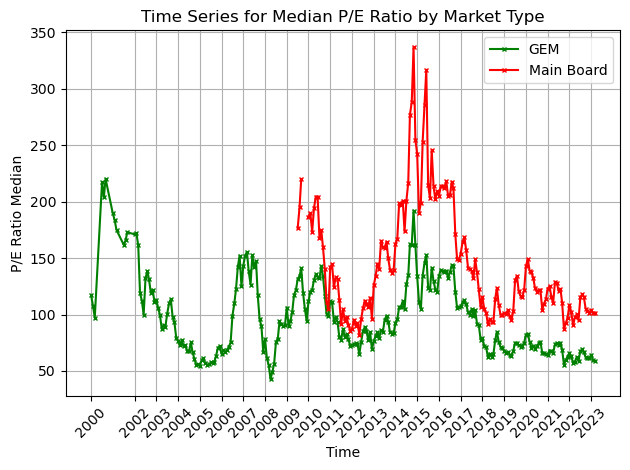

In [29]:
fig, ax = plt.subplots()

ax.plot(time, main_board_data, label='GEM', marker='x', markersize=3, color='g')
ax.plot(time, gem_data, label='Main Board', marker='x', markersize=3, color='r')

# Add the highest value notations
max_main_board = main_board_data.max()
max_gem = np.nan_to_num(gem_data,nan=0).max()

ax.set_title('Time Series for Median P/E Ratio by Market Type')
ax.set_xlabel('Time')
ax.set_ylabel('P/E Ratio Median')
ax.legend()
ax.grid(True)

# Manually set x-axis ticks and labels
ax.set_xticks(time_yearly)
ax.set_xticklabels([str(year.year) for year in time_yearly], rotation=45)

plt.tight_layout()
plt.show()
